In [1]:
import scanpy as sc
import omicverse as ov
import mudata
import simba as si
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
#adata_C=sc.read('/root/Desktop/我的网盘/RB_simba/adata_C.h5ad')
#adata_CG=sc.read('/root/Desktop/我的网盘/RB_simba/adata_CG.h5ad')
adata_CP=sc.read('/root/Desktop/我的网盘/RB_simba/adata_CP.h5ad')
adata_G=sc.read('/root/Desktop/我的网盘/RB_simba/adata_G.h5ad')
#adata_K=sc.read('/root/Desktop/我的网盘/RB_simba/adata_K.h5ad')
adata_M=sc.read('/root/Desktop/我的网盘/RB_simba/adata_M.h5ad')
adata_P=sc.read('/root/Desktop/我的网盘/RB_simba/adata_P.h5ad')
adata_PK=sc.read('/root/Desktop/我的网盘/RB_simba/adata_PK.h5ad')
adata_PM=sc.read('/root/Desktop/我的网盘/RB_simba/adata_PM.h5ad')
adata_all=sc.read('/root/Desktop/我的网盘/RB_simba/adata_all.h5ad')

In [3]:
#adata_PM.var.index = 'M_' + adata_PM.var.index

In [4]:
adata_M.obs

""
TF_TEAD4
TF_PLAGL2
TF_FOSB_JUNB
TF_GLI2
TF_DMRTA2
...
TF_FOSL2_JUN
TF_IRF5
TF_ZNF528
TF_MEF2C


In [3]:
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'
adata_all.obs.loc[adata_P.obs_names, 'entity_anno'] = 'peak'
adata_all.obs.loc[adata_K.obs_names, 'entity_anno'] = 'kmer'
adata_all.obs.loc[adata_M.obs_names, 'entity_anno'] = 'motif'

In [4]:
adata_all.obsm['X_simba']=adata_all.X.copy()
adata_all.obsm['X_umap']=ov.utils.mde(adata_all.obsm['X_simba'])

In [5]:
adata_all.write('/root/Desktop/我的网盘/RB_simba/adata_all.h5ad')

In [3]:
adata_C.obs['celltype'].cat.categories

Index(['CPC', 'Cone', 'Cone-tumor', 'Middle', 'P-p', 'RPC', 'RSC', 'Rod',
       'Rod pre', 'TCR'],
      dtype='object')

In [4]:
adata_CG.uns['celltype_colors']

array(['#e1c085', '#efbd49', '#ebe3a1', '#8c9a48', '#cebc49', '#f0c3c3',
       '#e07370', '#a22e2a', '#cb3e35', '#d3396d'], dtype=object)

In [5]:
palette_celltype=dict(zip(adata_C.obs['celltype'].cat.categories,adata_CG.uns['celltype_colors']))

In [6]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"
palette_entity_anno['kmer'] = "#94b1b7"
palette_entity_anno['motif'] = "#92ba79"
palette_entity_anno['peak'] = "#e5c2c8"

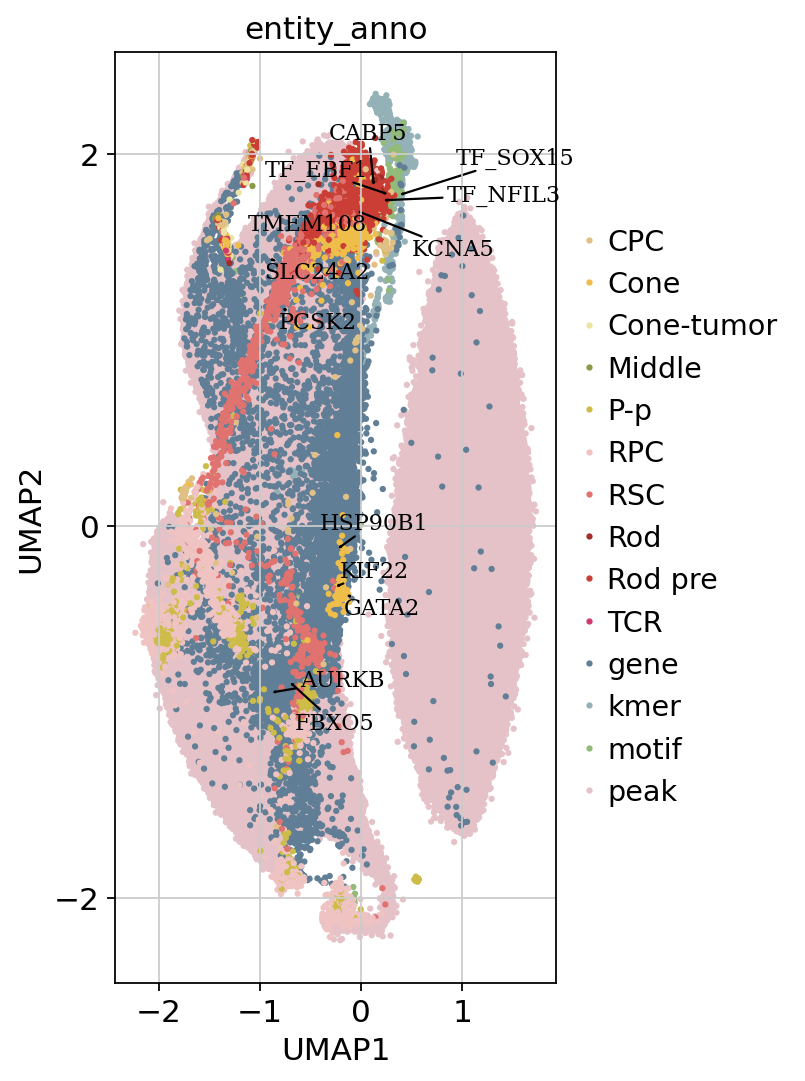

In [9]:
import matplotlib.pyplot as plt
marker_genes = [
        ]
si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(5,7),
           texts=marker_genes,
           text_expand=(2,1.5),
           show_texts=True,
           drawing_order='original')
plt.savefig('/root/Desktop/我的网盘/TF_new.png',dpi=300,bbox_inches='tight')

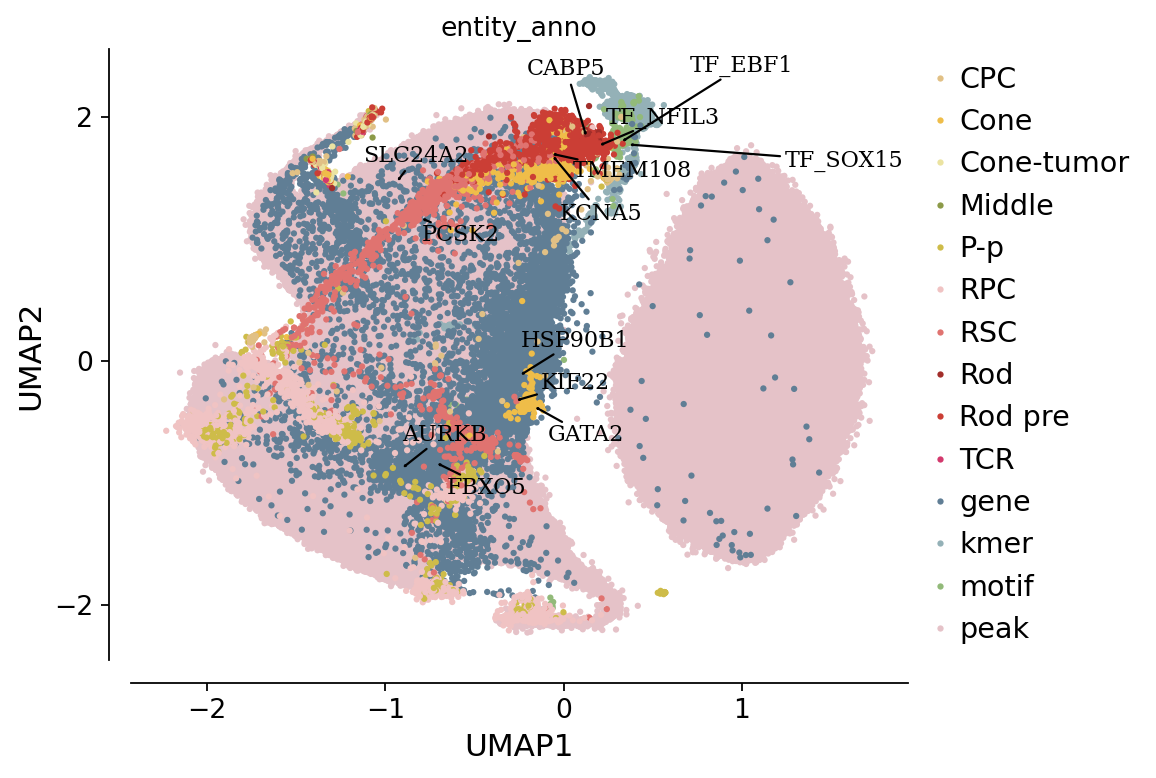

In [21]:
marker_genes = ['TF_EBF1','TF_SOX15',
         'TF_NFIL3','GATA2', 'KIF22', 'AURKB', 'FBXO5', 'HSP90B1', 'PCSK2', 'KCNA5',
                'CABP5', 'SLC24A2', 'TMEM108']

si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           drawing_order='original',
           texts=marker_genes,
           text_expand=(2,2),
           show_texts=True)
import matplotlib.pyplot as plt
plt.grid(False)
ax=plt.gca()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('entity_anno',fontsize=12)
plt.savefig('/root/Desktop/我的网盘/TF_new.png',dpi=300,bbox_inches='tight')

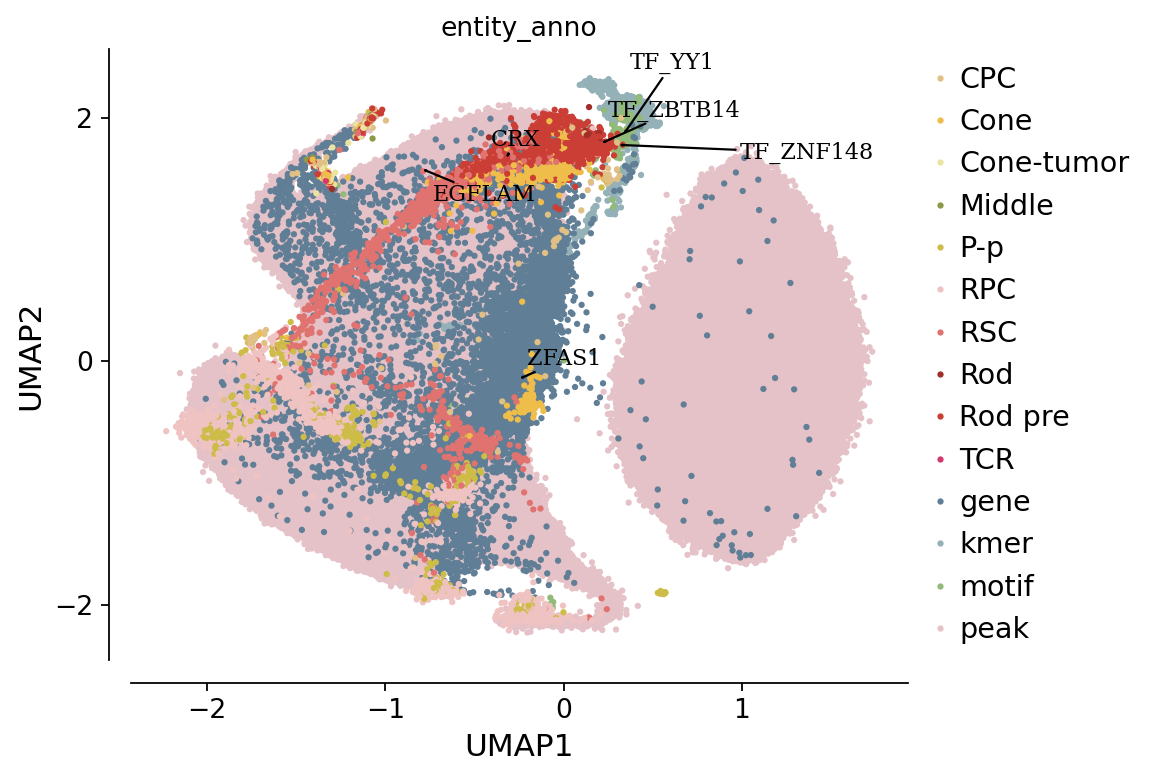

In [22]:
marker_genes = ['TF_ZBTB14','TF_ZNF148','TF_YY1','EGFLAM', 'ZFAS1', 'CRX']

si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           drawing_order='original',
           texts=marker_genes,
           text_expand=(2,2),
           show_texts=True)
import matplotlib.pyplot as plt
plt.grid(False)
ax=plt.gca()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('entity_anno',fontsize=12)
plt.savefig('/root/Desktop/我的网盘/TF_new2.png',dpi=300,bbox_inches='tight')

In [13]:
query_result = si.tl.query(adata_all,
                           pin=[0.4,1.8],
                           obsm='X_umap',
                           use_radius=True,r=1,
                           anno_filter='entity_anno',
                           filters=['motif', 'kmer'])
print(query_result.shape)
query_result.iloc[:10,]

(4629, 5)


,celltype,id_dataset,entity_anno,distance,query
CCCGGG,NaN,query_2,kmer,0.008695,0
GCACGT,NaN,query_2,kmer,0.012884,0
GCCCGG,NaN,query_2,kmer,0.013124,0
GGCGGG,NaN,query_2,kmer,0.013875,0
CCGGGC,NaN,query_2,kmer,0.015180,0
GGCGCC,NaN,query_2,kmer,0.015997,0
GCGCCC,NaN,query_2,kmer,0.015998,0
GGCGTG,NaN,query_2,kmer,0.017240,0
GGGCGC,NaN,query_2,kmer,0.017591,0
CCCGGC,NaN,query_2,kmer,0.018029,0


In [14]:
adata_all.obs_names_make_unique()

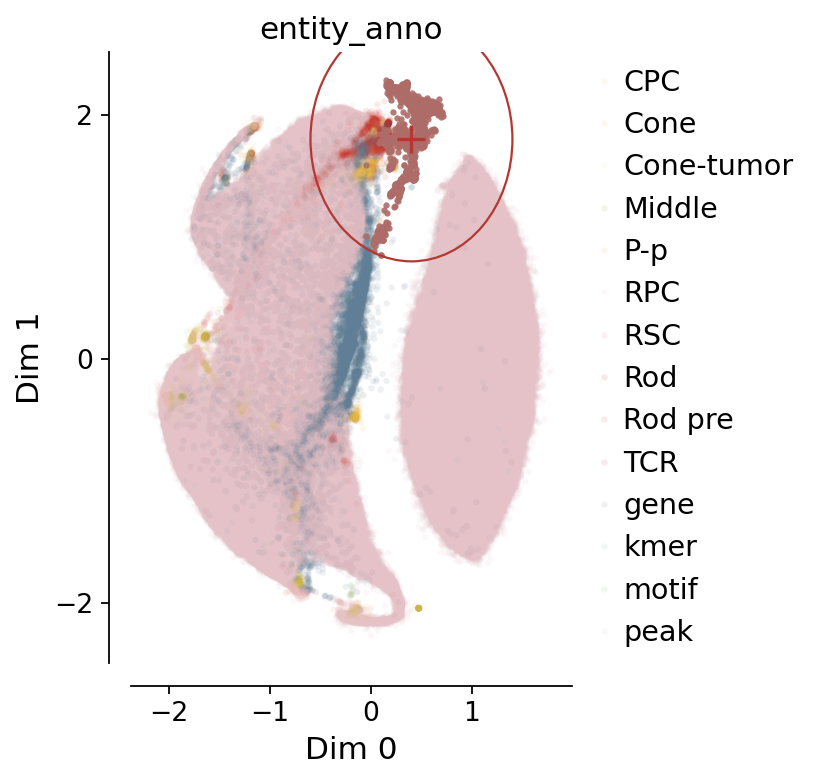

In [15]:
si.pl.query(adata_all,
            show_texts=False,
            color=['entity_anno'], dict_palette={'entity_anno': palette_entity_anno},
            alpha=0.9,
            alpha_bg=0.1,
            fig_size=(5,5),)
import matplotlib.pyplot as plt
plt.grid(False)
ax=plt.gca()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/root/Desktop/我的网盘/EBF1_new.png',dpi=300,bbox_inches='tight')

In [16]:
query_result.to_csv('/root/Desktop/我的网盘/EBF1_new.csv')

In [17]:
_ = si.tl.gene_scores(adata_CP,genome='hg38',use_gene_weigt=True,use_top_pcs=False)

Gene scores are being calculated for the first time
`use_precomputed` has been ignored
Processing: 0.0%
Processing: 20.0%
Processing: 40.0%
Processing: 60.0%
Processing: 80.0%


In [3]:
import pandas as pd
# find paired TF motifs and TF genes
motifs_genes = pd.DataFrame(columns=['motif', 'gene'])
for x in adata_M.obs_names:
    x_split = x.split('_')
    #print(x_split)
    for y in adata_G.obs_names:
        if y in x_split:
            if y !='TF':
                if x not in motifs_genes['motif'].values:
                    motifs_genes.loc[motifs_genes.shape[0]] = [x,y]

In [4]:
adata_M.obs

""
TF_TEAD4
TF_PLAGL2
TF_FOSB_JUNB
TF_GLI2
TF_DMRTA2
...
TF_FOSL2_JUN
TF_IRF5
TF_ZNF528
TF_MEF2C


In [5]:
adata_G.obs

""
RAD9B
CAMSAP3
KCTD7
C15orf61
CYYR1
...
CD53
AGA
DCST1-AS1
CASP8


In [6]:
motifs_genes['gene']

0       TEAD4
1      PLAGL2
2        FOSB
3        GLI2
4      DMRTA2
        ...  
467       JUN
468      IRF5
469    ZNF528
470     MEF2C
471      ALX3
Name: gene, Length: 472, dtype: object

In [7]:
adata_cmp_CM=sc.read('/root/Desktop/我的网盘/RB_simba/adata_cmp_CM.h5ad')
adata_cmp_CG=sc.read('/root/Desktop/我的网盘/RB_simba/adata_cmp_CG.h5ad')

In [8]:
list_tf_motif = motifs_genes['motif'].tolist()
list_tf_gene = motifs_genes['gene'].tolist()

df_metrics_motif = adata_cmp_CM.var.copy()
df_metrics_gene = adata_cmp_CG.var.copy()
df_metrics_motif.head()

,max,std,gini,entropy
TF_TEAD4,3.826821,2.244921,0.867818,7.159141
TF_PLAGL2,3.524986,2.178621,0.819315,7.920461
TF_FOSB_JUNB,4.437782,3.398970,0.942309,6.485650
TF_GLI2,3.268741,2.204542,0.814763,8.026469
TF_DMRTA2,3.278861,2.089663,0.799579,8.104730


In [9]:
import numpy as np
master_regulators = ['ZBTB14', 
               'ZNF148',
              'YY1','EBF1', 
               'SOX15',
              'NFIL3'
             ]
list_tf_motif = motifs_genes[np.isin(motifs_genes['gene'], master_regulators)]['motif'].tolist()
list_tf_gene = motifs_genes[np.isin(motifs_genes['gene'], master_regulators)]['gene'].tolist()

In [7]:
import os

In [24]:
workdir = 'RB_simba'
si.settings.set_workdir(workdir)

Saving results in: RB_simba


In [25]:
adata_CP.write(os.path.join(workdir,'adata_CP.h5ad'))

In [1]:
import scanpy as sc
import omicverse as ov
import mudata
import simba as si
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [10]:
adata_PM=sc.read('/root/Desktop/我的网盘/RB_simba/adata_PM.h5ad')

In [10]:
adata_PM.var.index = 'TF_' + adata_PM.var.index

In [11]:
dict_tf_targets = si.tl.find_target_genes(adata_all,
                                          adata_PM,
                                          list_tf_motif=list_tf_motif,
                                          list_tf_gene=list_tf_gene,
                                          adata_CP=adata_CP,
                                          cutoff_gene=5000)

Preprocessing ...
#genes: 16268
#peaks: 300000
#genes-associated peaks: 141601
computing distances between genes and genes-associated peaks ...
Saving variables into `.uns['tf_targets']` ...
searching for target genes of TF_SOX15
#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 378
completed: 0.0%
completed: 19.8%
completed: 39.7%
completed: 59.5%
completed: 79.4%
completed: 99.2%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of TF_EBF1
#candinate genes is 400
removing duplicate genes ...
removing genes that do not contain TF motif ...
#candinate genes is 369
completed: 0.0%
completed: 19.8%
completed: 39.6%
completed: 59.3%
completed: 79.1%
completed: 98.9%
Pruning candidate genes based on nearby peaks ...
Pruning candidate genes based on average rank ...
searching for target genes of TF_ZBTB14
#candinate genes is 400
removing duplica

In [12]:
import pickle
with open('/root/Desktop/我的网盘/dict_tf_rb_targets.pkl','wb') as f:
    pickle.dump(dict_tf_targets,f)

In [1]:
import pickle
#all_tf_target=['M_TBX3','M_MGA']
with open('/root/Desktop/我的网盘/dict_tf_rb_targets.pkl','rb') as f:
    dict_tf_targets=pickle.load(f)

In [2]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['ZNF148']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [3]:
p=dict(G.nodes)

In [4]:
color_li=[]

for i in p.keys():
    if i in ['ZNF148']:
        color_li.append('#d3396d')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

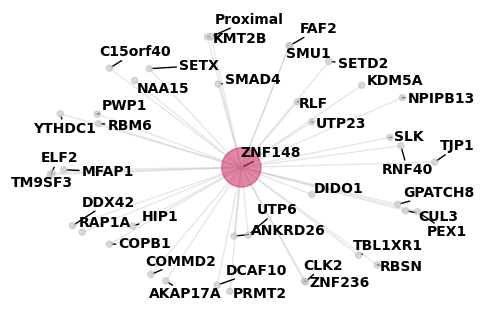

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_ZNF148.png',dpi=300,bbox_inches='tight')

In [6]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['YY1']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [7]:
p=dict(G.nodes)

In [8]:
color_li=[]

for i in p.keys():
    if i in ['YY1']:
        color_li.append('#cb3e35')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

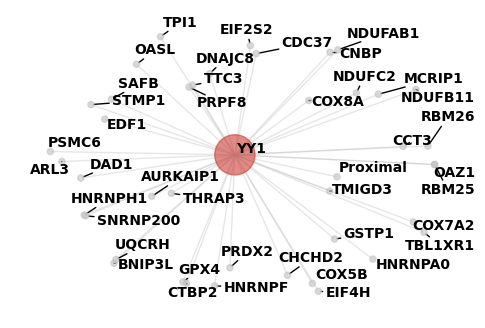

In [10]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_YY1.png',dpi=300,bbox_inches='tight')

In [11]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['ZBTB14']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [12]:
p=dict(G.nodes)

In [13]:
color_li=[]

for i in p.keys():
    if i in ['ZBTB14']:
        color_li.append('#8c9a48')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

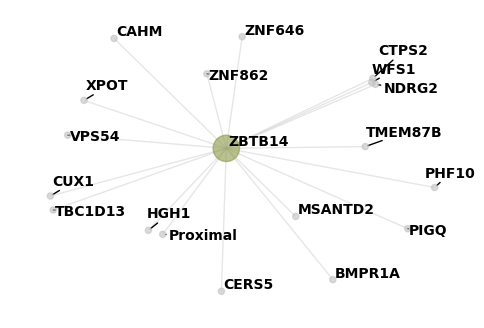

In [15]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_ZBTB14.png',dpi=300,bbox_inches='tight')

In [16]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['EBF1']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [17]:
p=dict(G.nodes)

In [18]:
color_li=[]

for i in p.keys():
    if i in ['EBF1']:
        color_li.append('#cebc49')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

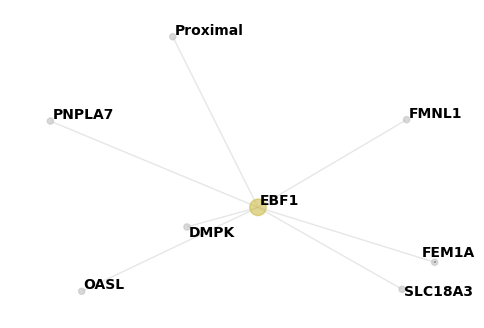

In [19]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_EBF1.png',dpi=300,bbox_inches='tight')

In [20]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['SOX15']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [21]:
p=dict(G.nodes)

In [22]:
color_li=[]

for i in p.keys():
    if i in ['SOX15']:
        color_li.append('#efbd49')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

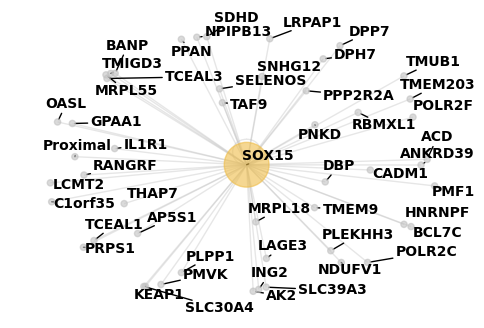

In [23]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_SOX15.png',dpi=300,bbox_inches='tight')

In [24]:
import networkx as nx
G = nx.Graph()
#herb_jvhua=herb
for i in ['NFIL3']:
    for j in dict_tf_targets[f'TF_{i}'].index.tolist():
        G.add_edge(i,j)

In [25]:
p=dict(G.nodes)

In [26]:
color_li=[]

for i in p.keys():
    if i in ['NFIL3']:
        color_li.append('#ebe3a1')
   # elif i in ['PBX1','ETS1','RORA','cDC']:
      #  color_li.append(color_dict['cDC2'])
        #print(i)
    else:
        color_li.append('#c2c2c2')

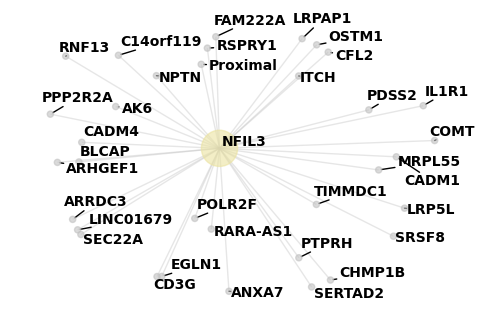

In [27]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.spring_layout(G, scale=1, k=0.01)

#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*20 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(p.keys())
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='-', color='black'))
ax.axis("off")
plt.savefig('/root/Desktop/我的网盘/gene_NFIL3.png',dpi=300,bbox_inches='tight')

In [28]:
import pickle
import pandas as pd

# 加载 .pkl 文件
with open('/root/Desktop/我的网盘/dict_tf_rb_targets.pkl','rb') as f:
    dict_tf_targets = pickle.load(f)

# 列出所有你感兴趣的转录因子基因
tfs_of_interest = ['TF_ZBTB14','TF_ZNF148','TF_YY1','TF_EBF1','TF_SOX15',
         'TF_NFIL3']  # 以此类推

# 遍历所有感兴趣的转录因子
for tf in tfs_of_interest:
    if tf in dict_tf_targets:
        # 假设 target_genes 是一个 DataFrame，其中包含基因和其他相关信息
        target_genes_df = dict_tf_targets[tf]

        # 为每个基因创建一个标识符列
        target_genes_df['target_genes'] = tf  # 这里我们直接使用转录因子的名称作为标识符

        # 保存为 CSV 文件
        csv_file_path = f'/root/Desktop/我的网盘/CSV_RB/{tf}_target_genes.csv'
        target_genes_df.to_csv(csv_file_path, index=False)
        print(f"CSV file for {tf} saved: {csv_file_path}")
    else:
        print(f"{tf} not found in the data.")

CSV file for TF_ZBTB14 saved: /root/Desktop/我的网盘/CSV_RB/TF_ZBTB14_target_genes.csv
CSV file for TF_ZNF148 saved: /root/Desktop/我的网盘/CSV_RB/TF_ZNF148_target_genes.csv
CSV file for TF_YY1 saved: /root/Desktop/我的网盘/CSV_RB/TF_YY1_target_genes.csv
CSV file for TF_EBF1 saved: /root/Desktop/我的网盘/CSV_RB/TF_EBF1_target_genes.csv
CSV file for TF_SOX15 saved: /root/Desktop/我的网盘/CSV_RB/TF_SOX15_target_genes.csv
CSV file for TF_NFIL3 saved: /root/Desktop/我的网盘/CSV_RB/TF_NFIL3_target_genes.csv


In [7]:
#得到靶基因以及它的csv文件

import pickle
import pandas as pd

# 加载 .pkl 文件
with open('/root/Desktop/我的网盘/dict_tf_rb_targets.pkl','rb') as f:
    dict_tf_targets = pickle.load(f)

# 提取特定 TF 的信息
tf_of_interest = 'TF_NFIL3'
if tf_of_interest in dict_tf_targets:
    # 假设 target_genes 是一个 DataFrame，其中包含基因和其他相关信息
    target_genes_df = dict_tf_targets[tf_of_interest]

    # 添加一个新列 'target_genes' 来标识每个基因是否为目标基因
    # 这里我们假设所有在DataFrame中的基因都是目标基因
    target_genes_df['target_genes'] = target_genes_df.index.tolist()

    # 保存为 CSV 文件
    csv_file_path = '/root/Desktop/我的网盘/CSV_RB/' + tf_of_interest + '_target_genes.csv'
    target_genes_df.to_csv(csv_file_path, index=False)
    print(f"CSV file saved: {csv_file_path}")
else:
    print(f"{tf_of_interest} not found in the data.")

CSV file saved: /root/Desktop/我的网盘/CSV_RB/TF_NFIL3_target_genes.csv
